# Project 2: Predicting Iowa Housing Price with Linear Regression

--- 
# Notebook 01 : 

---

Notebook Series:
1) EDA   (this notebook)
2) Data Cleaning 
3) Preprocessing and Feature Engineering
4) Model Training and Insights

## Problem Statement

As being employed by a professional realtor company, which specializes in buying in the existing properties, performing valuation on houses and selling-out these properties for profit, I'm given task to optimize the investment and maximize the ROI (Return on Investment). Subsequently, this information can pass down to home sellers and buyers along the different phases of the process. 

To achieve that, this study aims to:
* Develope a predictive model to estimate the price of houses based on fixed features i.e. characteristics that cannot be easily renovated (e.g. location, square feet, number of bedrooms and bathrooms)
* Identify top 5 important features for high sale price houses 

Problem Statement: Given a list of houses' IDs, what are the predicted house Sale Price for each? 

## Executive Summary & Background
Our company started a new project to determine the key housing features to highlight and to predict the future housing price in Ames, Iowa. Iowa's housing market broke record after record in summer 2021, according to the Iowa Association of REALTORS® (IAR).([*source*](https://www.weareiowa.com/article/news/local/after-another-record-breaking-month-iowa-realtor-describes-perfect-storm-housing-market-jen-burkamper/524-b0d79923-32d4-4c82-a6a5-de3c10afbc02))

Data management team has gathered housing data for houses sold from year 2006 to 2010 for us. From Ames housing dataset provided, there were over 2000 housing observations and more than 80 features (e.g. square feet, house condition, kitchen quality, material quality, etc.).To get preliminary views of relationships between our features, I started off performing a series of exploratory visualizations analyzing our target `SalePrice` and our predictors. I found that the features, neighbourhood, the size of certain areas of the house, house age and overall quality seem to exhibit a strong relationship with Sale Prices.

This was followed by data cleaning, where I dealt with null and missing values. In general, I used <b>label encoding</b> to deal with categorical variables and <b>one-hot encoding</b> to deal with  nominal variables. To reduce the total number of features, I used two dimensionality reduction techniques - elimination of features according to variance, and elimination of features according to pairwise correlation and correlation with target. <b>Recursive Feature Elimination</b> was also used to help weed out redudant variables.

The `train` dataset was split into two parts; train part and test part. The train acts as data to train model and the test acts as new/ unseen data to score the model. After testing out various types of <b>regularization</b> such as Ridge, Lasso and ElasticNet regression, I settled on a *Lasso* regression model as it returned the best R-Squared and RMSE score. 

The most important predictors within this model were 
- ground living area square footage, 
- the quality of the exterior facade, 
- basement square footage, 
- basement quality and 
- kitchen quality 
- Neighborhoods (<b>Stone Brook</b> and <b>Northridge Heights</b> have a strong positive impact on sale price while <b>Old Town</b> and <b>North Ames</b> have a negative impact on sale price

In terms of features, homes with a second story or a second kitchen tended to have lower house prices.

### Datasets

There are 2 datasets included in the [`datasets`](./datasets/) folder for this project. The process starts with generating the regression model using the training data, then predicting the values for target column in the test dataset.

* [`train.csv`](./datasets/train.csv): training set
* [`test.csv`](./datasets/test.csv): testing set 

### Data Dictionary

The data dictionary that summarized our data [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt). 

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import json

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Show all data rows and columns.
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 900)

In [3]:
df_train = pd.read_csv("./datasets/train.csv")

## Exploratory Visualisation

### Data overview

In [4]:
# print first 5 rows
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# print data rows & columns, dtype, non-null count
print(df_train.shape)
df_train.info()

(2051, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  Hou

In [6]:
# Create mask for numeric and categorical features
numeric_features = [col for col in df_train._get_numeric_data().columns]
categorical_features = [col for col in df_train.select_dtypes(include=['object']).columns]

## Scatterplot of numeric features

In [7]:
# custom function for plotting numeric features
def eda_scatterplot(df, list_of_columns, target):
    nrows = int(np.ceil(len(list_of_columns)/4))
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows*2.5))
    ax = ax.ravel() # ravel turns matrix into vector which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        g = sns.regplot(data=df, x=column, y=target, ax=ax[i], color='skyblue', line_kws={'color':'orange'})
        ax[i].set_title(column, fontsize=14)
        ax[i].set_xlabel('')
        plt.tight_layout()
        
    # Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # start from -1
    
    plt.suptitle('Scatterplots of Numeric Features vs Sale Price', fontsize=20, y=1.01)

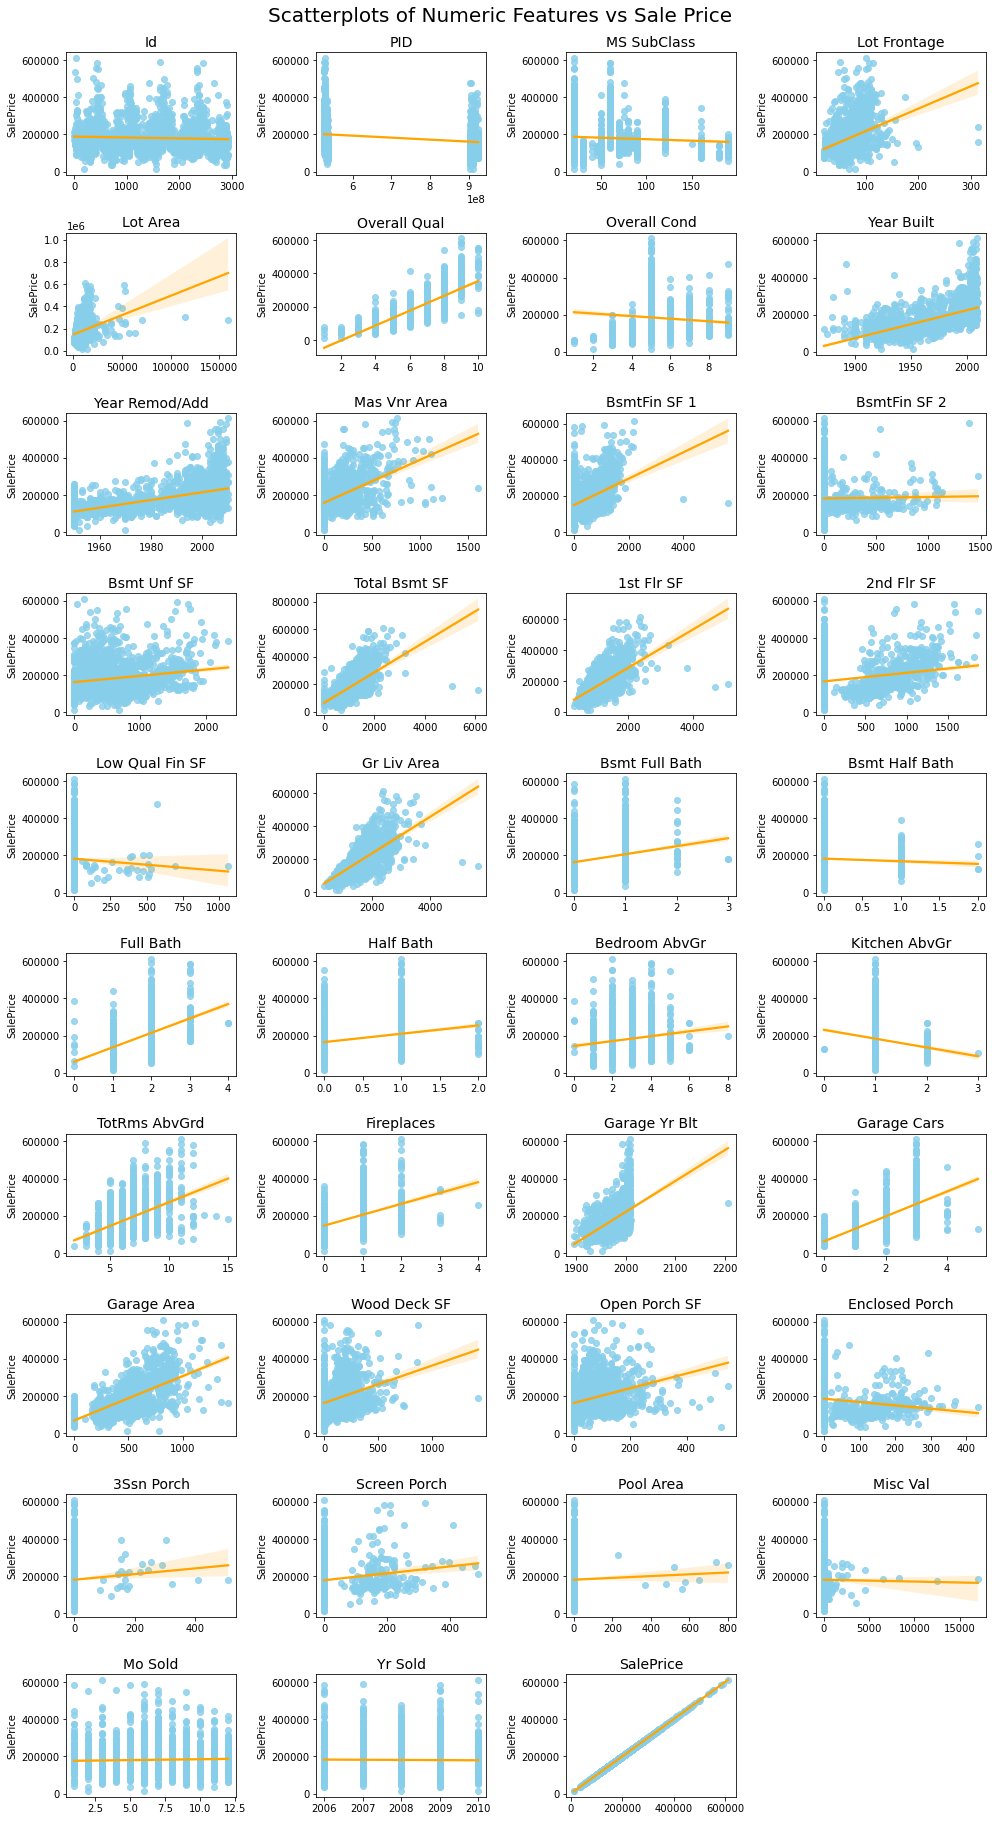

In [8]:
eda_scatterplot(df_train, numeric_features, 'SalePrice')

From the glance at scatterplot, we can tell that some features have very strong positive relationship with SalePrice, such as `Gr Liv Area` and `Garage Area`. In general, features involving square footage have a strong correlation with SalePrice. This makes sense given that the size of a house is probably a key consideration for any prosepctive buyer. The age of the property also has a strong correlation with SalePrice, i.e. newer houses tend to have higher prices.

Interestingly, `Overall Cond`has negative correlation with SalePrice, where houses in a better condition rating tend to have lower SalePrice. Set this aside, in general, the higher the number of a property feature (e.g. `fireplaces` and `Garage Cars`), the higher the SalePrice. Some features contain obvious outliers within `Gr Liv Area` and `Lot Fontage` which seem to represent abnormally large houses within Ames.

Time-based features such as `Mo Sold` and `Yr Sold` seem to have no relationship with SalePrice. This is slightly odd given that financial crisis that occured in 2008. Housing prices seem to fall in a narrower range in 2008, but the avearge mean and median is still similar to the preceeding and following years. We observed from `Year Remod/add` that it seems to be a housing boom in late 90s/early 2000s where more houses were rebuilt or remodeled. 

## Histogram of numeric features

In [9]:
# custom function for plotting numeric features
def eda_histogram(df, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/5))
    ncols = 5
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows*2.5))
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns):
        sns.histplot(data=df, x=df[column], kde=False, ax=ax[i], fill=False)
        ax[i].set_title(column, fontsize=14)
        ax[i].set_xlabel('')
        ax[i].tick_params(labelsize=10)
    plt.tight_layout(h_pad=-0.4, w_pad=-0.4)
        
    # Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # start from -1
    
    plt.suptitle('Histograms of Numeric Features', fontsize=20, y=1.01)

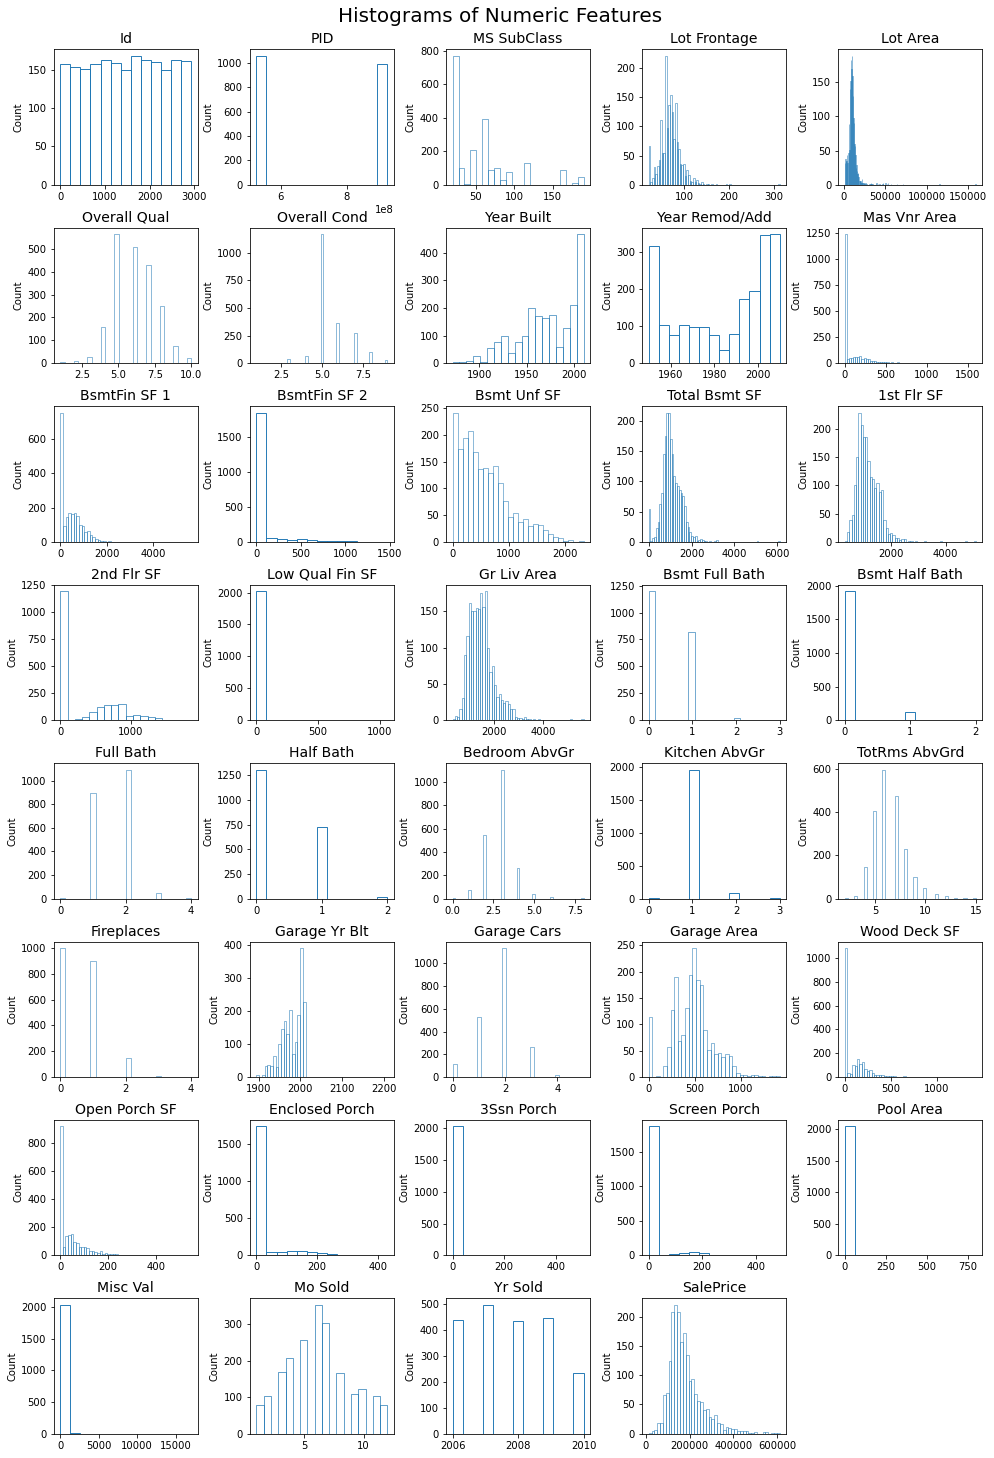

In [10]:
eda_histogram(df_train, numeric_features)

Looking at the *distribution* of the features, it's clear that a large number of features such as `Yr Built` and our target `SalePrice` are significantly right-skewed. Furthermore, these features also tend to have some degree of kurtosis, where a large number of extreme values exist, as we observed in `SalePrice` and`Gr Liv Area`. In short, there are outliers that we need to deal with later on.
In terms of variance, some features (e.g. `Pool Area`) have little variance which means that they will be less effective in predicting SalePrice.

## Boxplot of categorical features

In [11]:
# custom function for plotting categorical features
def eda_boxplot(df, list_of_columns, target):
    nrows = int(np.ceil(len(list_of_columns)/5))
    ncols = 5
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns):
        g = sns.boxplot(data=df, y=column, x=target, ax=ax[i], orient='h')
        ax[i].set_title(column, fontsize=16)
        g.set(xlabel=None)
        g.set(ylabel=None)
        g.set(xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000])
        g.set(xticklabels=['0k', '100k', '200k', '300k', '400k', '500k', '600k'])
        plt.tight_layout()
        
    # Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # start from -1
    
    plt.suptitle('Boxplot of Categorical Features vs SalePrice', fontsize=20, y=1.01)

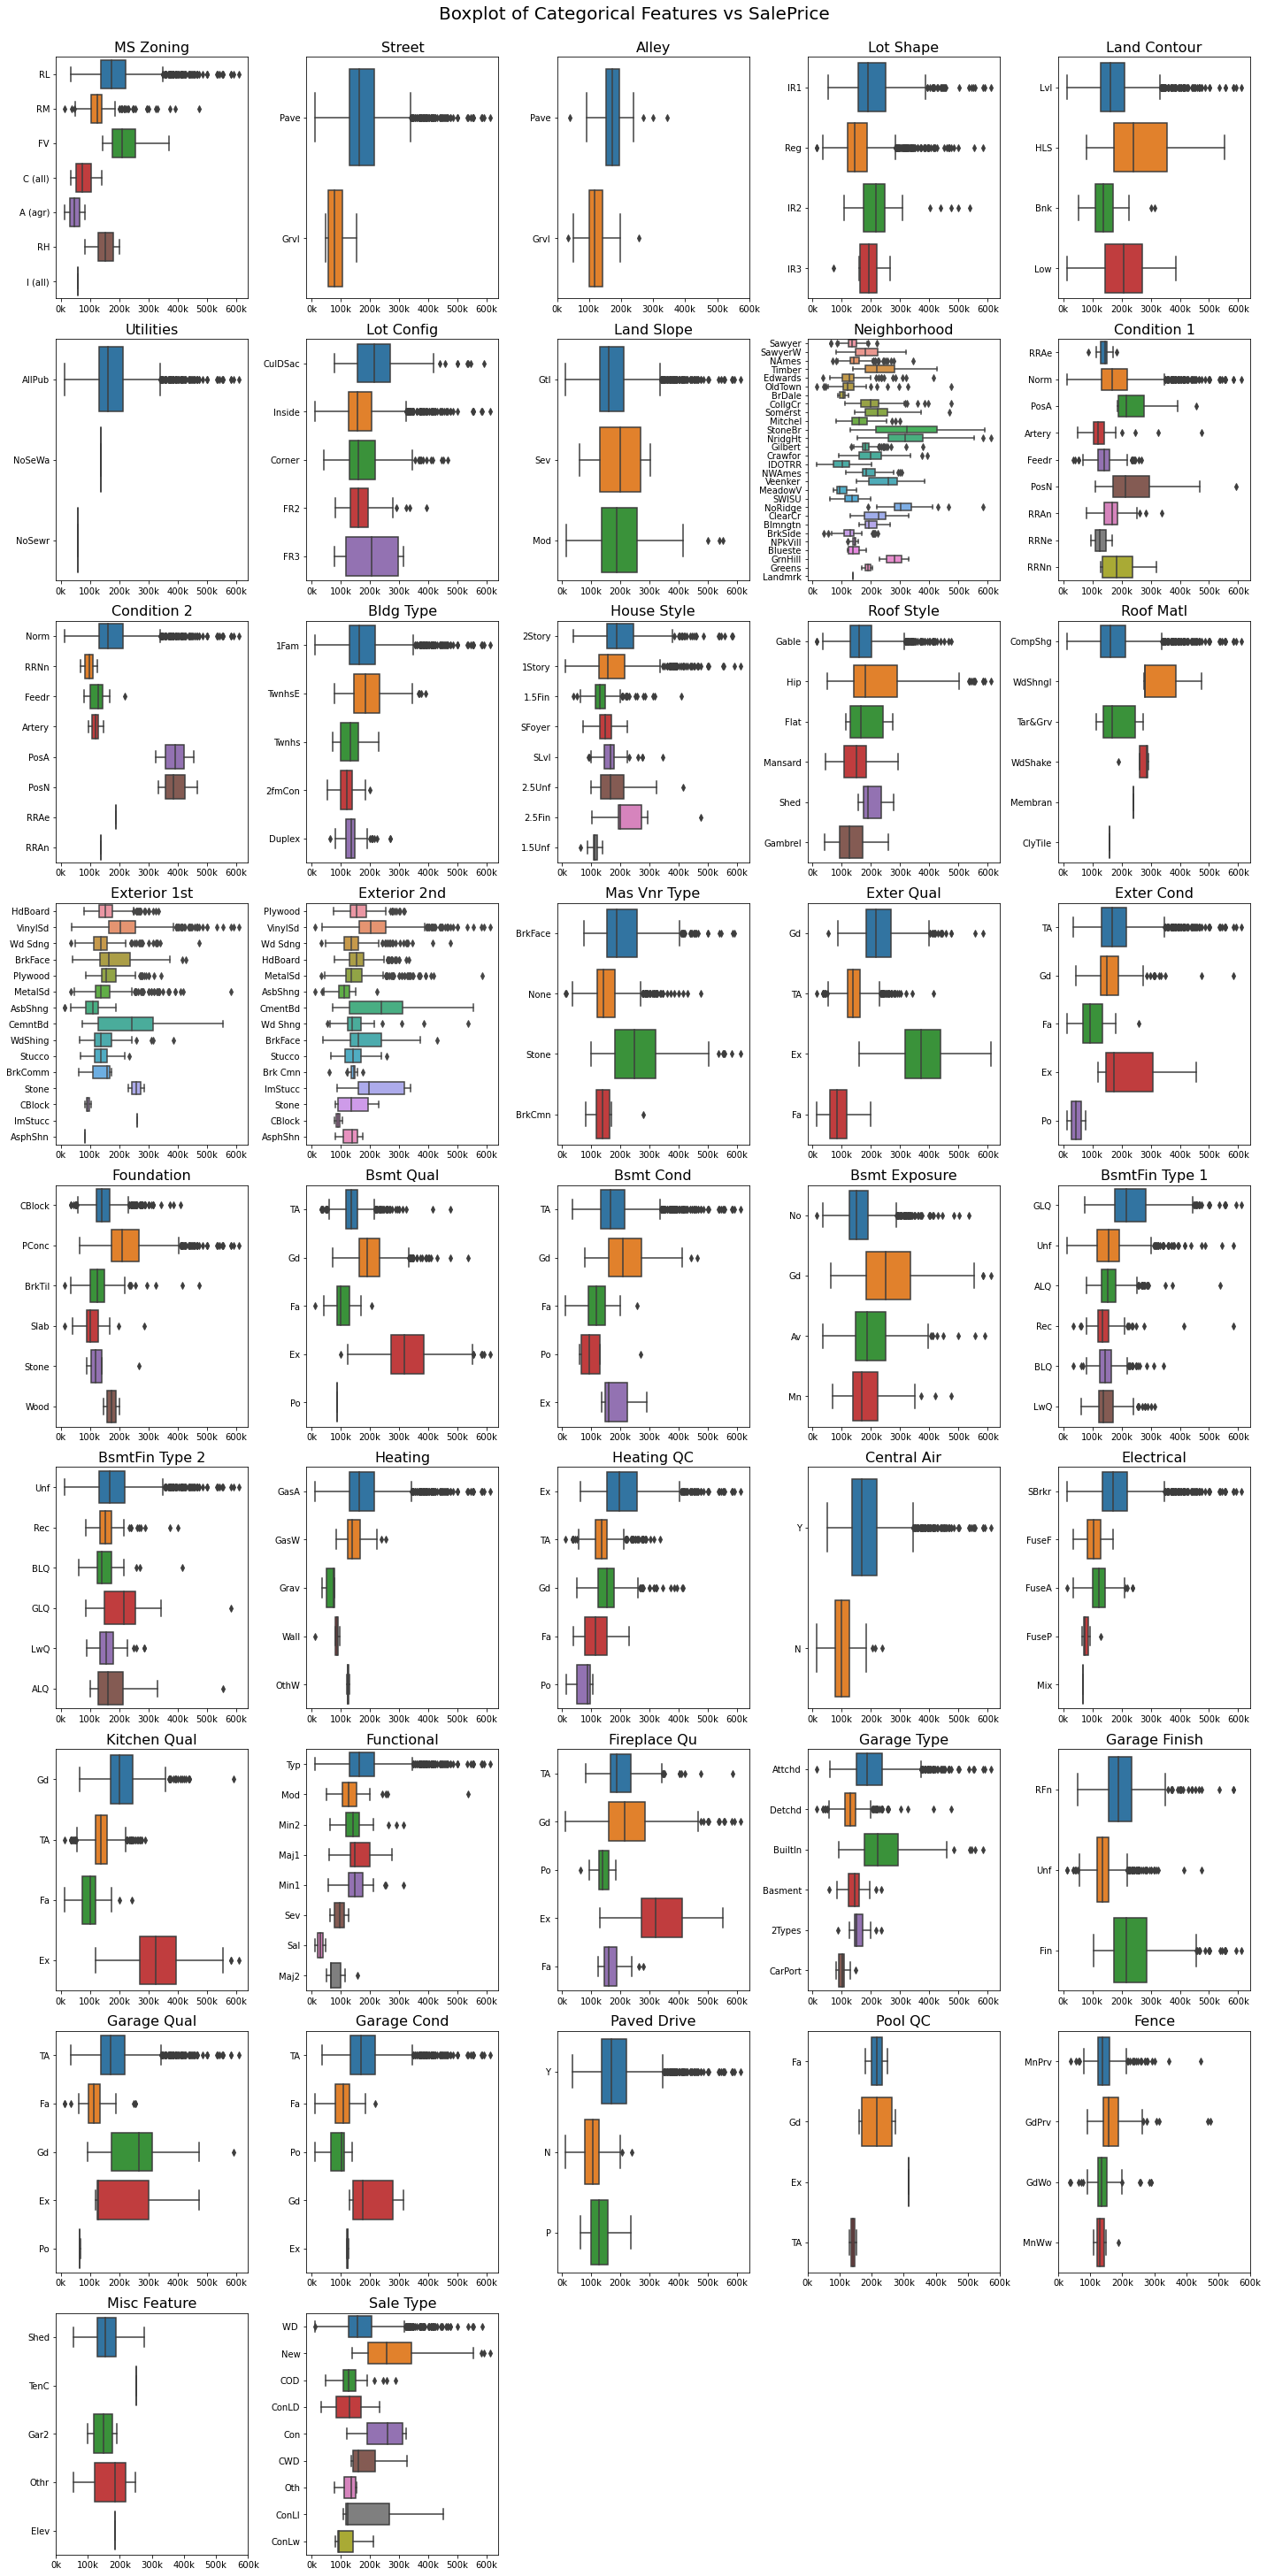

In [12]:
eda_boxplot(df_train, categorical_features, "SalePrice")

Several categorical features seem to have clear relationship with SalePrice. For instance, houses that have `Paved Drive` (Yes/ Partial) have higher mdeian SalePrice. The same was observed in high `Heating QC`. This makes sense when one says about the home functionality - the more functional the home, the higher the SalePrice.

Paved streets and paved alleyways also have noticeable higher median than houses with no street/ alleyway access. Home style also clearly affects SalePrice, in the sense that multi-story houses yield higher mdeian SalePrice than single-story houses. 

Text(0, 0.5, 'Sale Price')

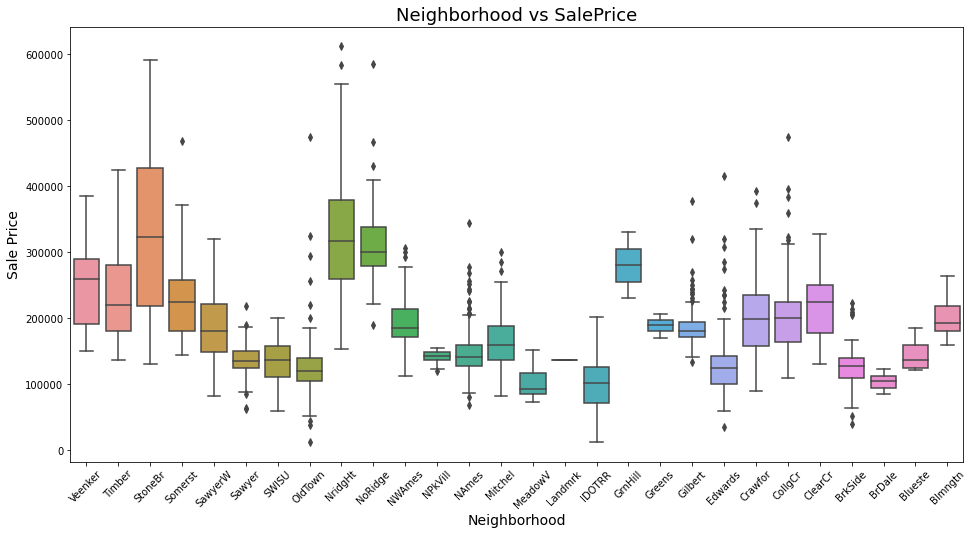

In [13]:
# Close-up view of Neighbourhood in sorted
plt.figure(figsize=(16,8))
sns.boxplot(data=df_train, x=df_train['Neighborhood'].sort_values(ascending=False), y=df_train['SalePrice'])
plt.xticks(rotation=45);
plt.title('Neighborhood vs SalePrice', fontsize=18)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)

The Neighborhood boxplot is of particular interest. Houses in certain Neighborhoods such as `NridgHt` and `NoRidge` have much higher median sale prices than houses in other Neighborhoods like `OldTown` and `MeadowV`.

## Strip Plots of categorical features

In [14]:
# custom function for plotting categorical features
def eda_stripplot(df, list_of_columns, target):
    nrows = int(np.ceil(len(list_of_columns)/5))
    ncols = 5
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns):
        g = sns.stripplot(data=df, y=column, x=target, ax=ax[i], orient='h')
        ax[i].set_title(column, fontsize=16)
        g.set(xlabel=None)
        g.set(ylabel=None)
        g.set(xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000])
        g.set(xticklabels=['0k', '100k', '200k', '300k', '400k', '500k', '600k'])
        plt.tight_layout()
        
    # Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # start from -1
    
    plt.suptitle('Stripplot of Categorical Features vs SalePrice', fontsize=20, y=1.01)

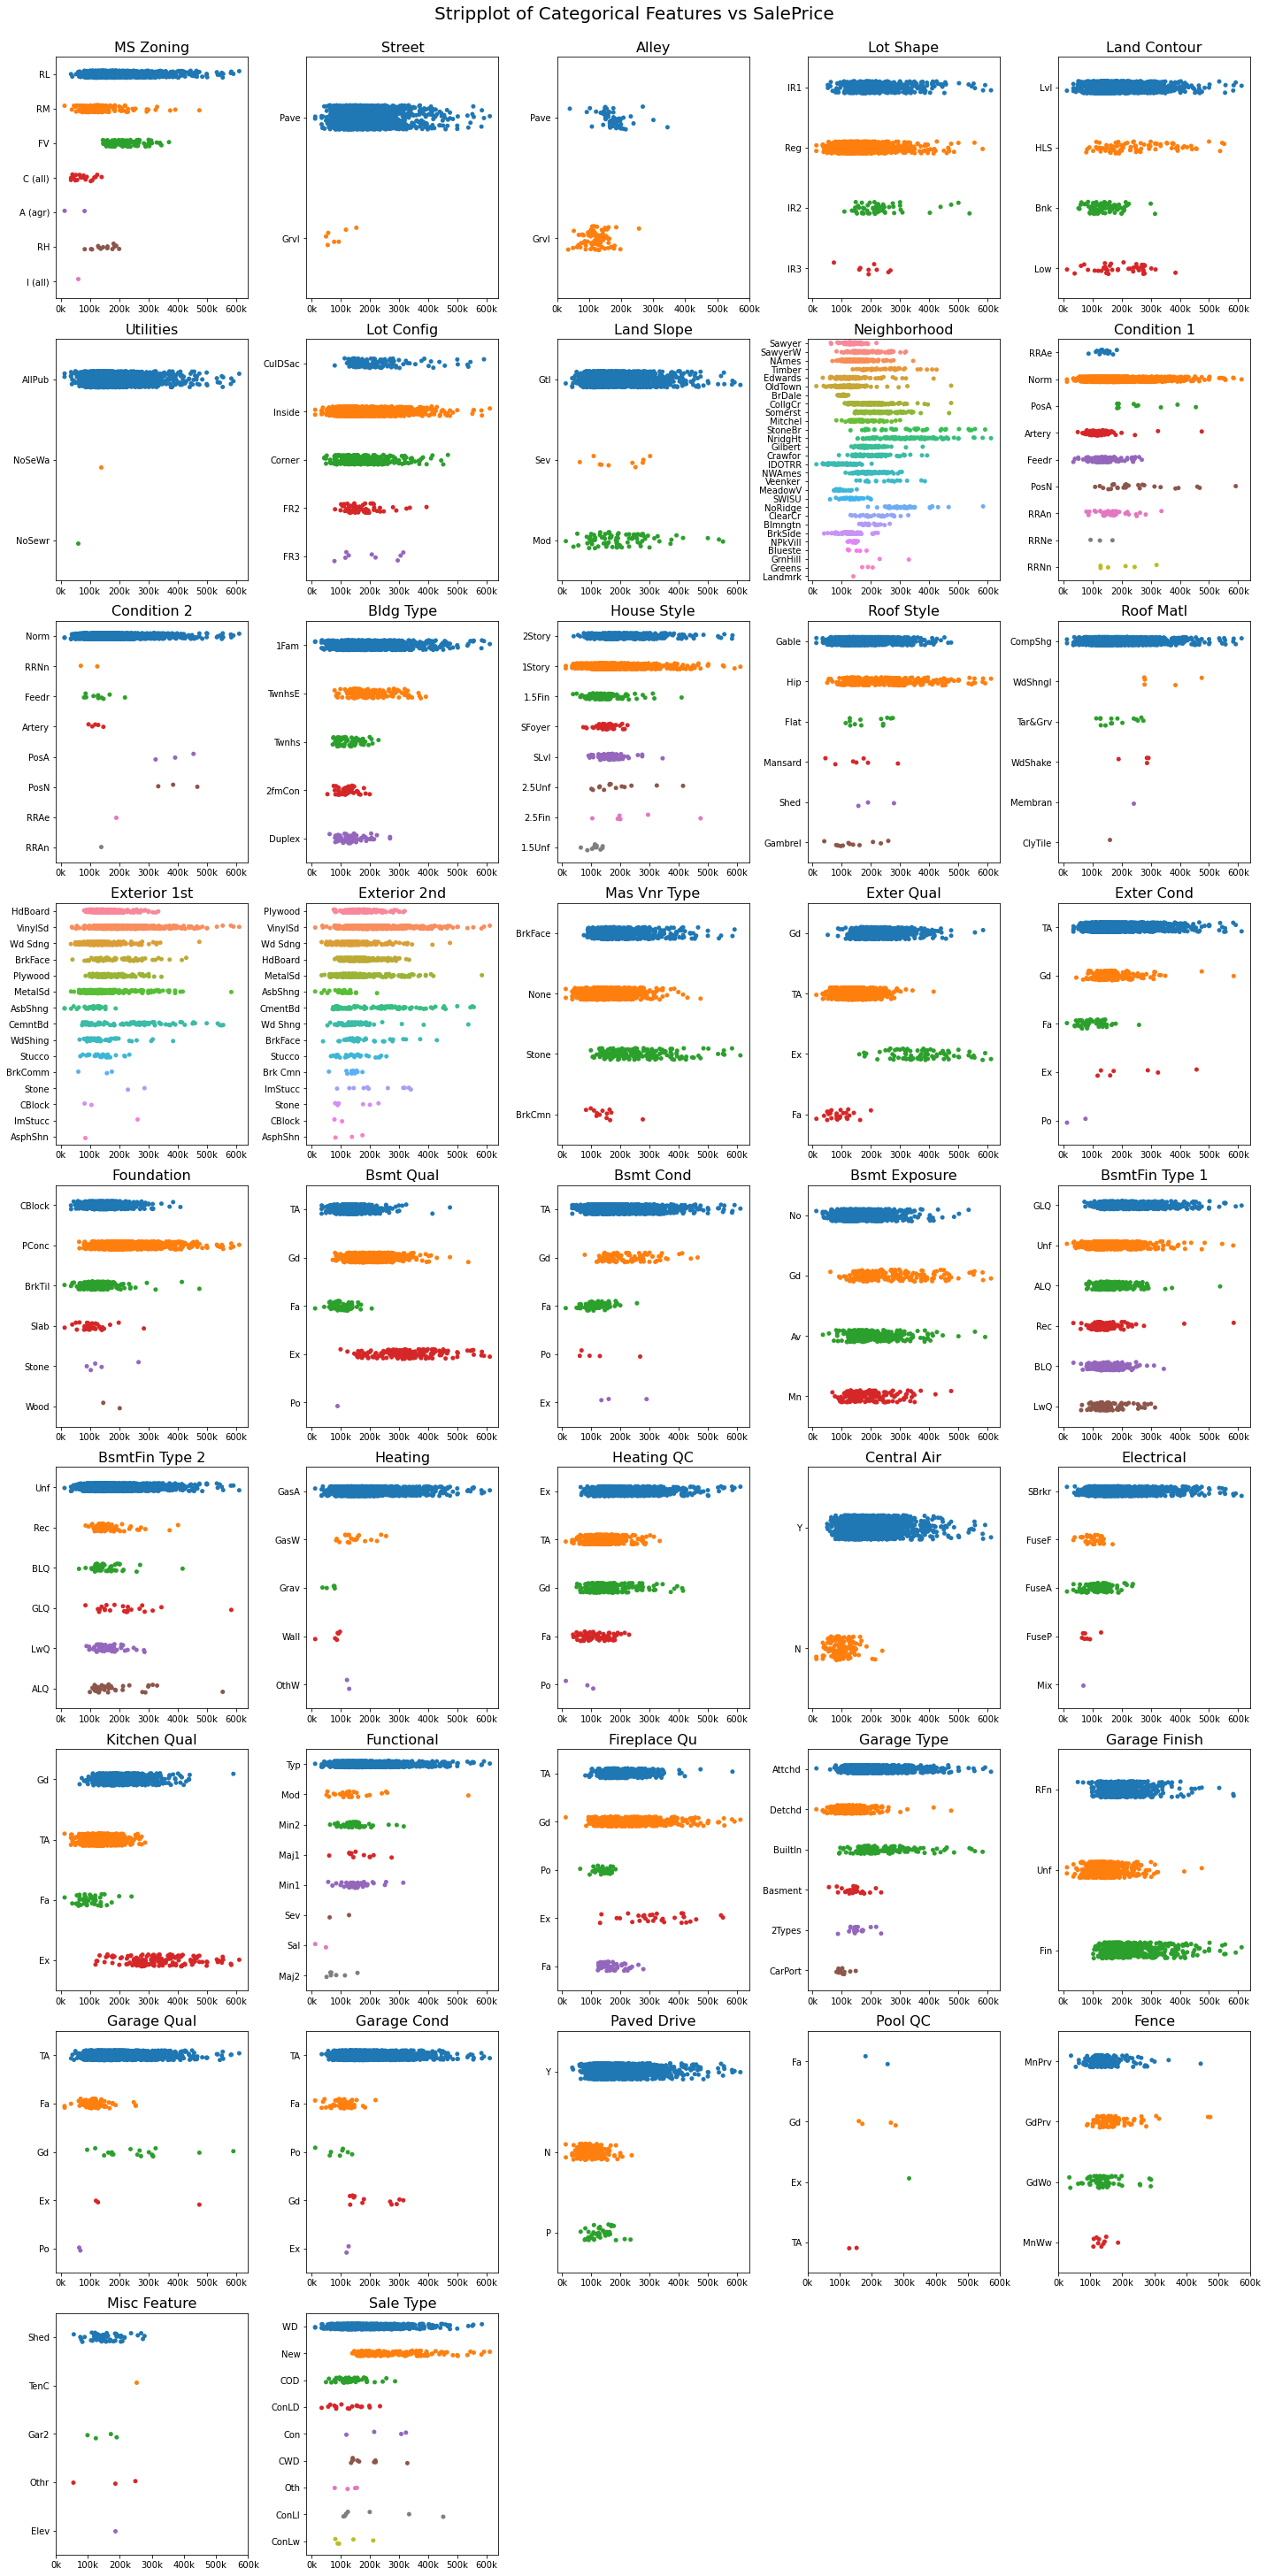

In [15]:
eda_stripplot(df_train, categorical_features, "SalePrice")

For the distribution of categorical features, we noticed that some features (e.g. `Pool QC`) have almost empty. While for other features (e.g. `Street` and `Utilities`) have almost no variance, all houses gather in a single category.

Text(0, 0.5, 'Sale Price')

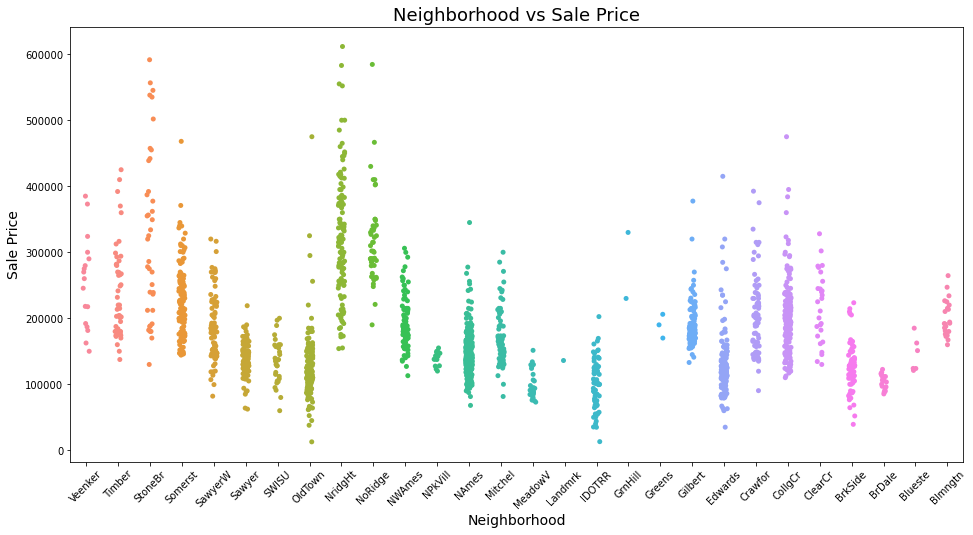

In [16]:
# Close-up view at Neighborhood distribution
plt.figure(figsize=(16, 8))
sns.stripplot(data=df_train, x=df_train['Neighborhood'].sort_values(ascending=False), y=df_train['SalePrice'])
plt.xticks(rotation=45);
plt.title('Neighborhood vs Sale Price', fontsize=18)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)

Some neighborhoods (e.g. `Lamdmark`, `GrnHill`, and `Greens`) have extremely small sample size. These variables will probably be statistically insignificant in predicting housing price. 

## Model Feasibility

Multiple linear regression analysis makes several key assumptions, LINEM:
- L  - <b>there needs to be a linear relationship between the outcome variable and the independent variables</b>. We've seen that this is largely true, with most variables having either a negative or positive linear relationship with `SalePrice`.
- I - <b>observations should not affect one another.</b>
- N - <b>there must be multivariate normality</b>, as multiple regression assumes that the residuals are normally distributed. From distribution plots above, we can see that most of our variables are normally distributed. However, there are a number of variables that are highly skewed and have multimodal distributions. We can move forward on the assumption that we'll avoid using these variables for our model as far as possible.
- E - <b>Equal variances, "homoscedasticity"</b> Residuals should have approximately equal variances for each x.
- M - <b>there must not be multicollinearity</b> Multiple regression assumes that the independent variables are not highly correlated with each other. Quick check with using the heatmap below, it seems that a number of features are multicollinear, with a high coefficient magnitiude of >0.8. This isn't ideal, as multicollinearity will lower the precision of our estimate coefficients.

### Check for Linearity

In [17]:
# Temporary fill in null values to allow plotting of residuals
df_train = df_train.fillna(0)

In [18]:
# Create a baseline linear model
features = [col for col in df_train._get_numeric_data().columns if col != 'SalePrice']
features 
X = df_train[features]
y = df_train['SalePrice']

lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

In [19]:
# Score the baseline model
print('R2:', lr.score(X,y))
print('RMSE', np.sqrt(mean_squared_error(y, y_pred)))

R2: 0.8410808671827918
RMSE 31588.493600183727


### Check for Homoscedasticity
<b>The independent variables must be homoscedastic</b>. This means that the variance of error terms must be similar across the values of the independent variables. According to our scatterplot below, points are mostly equally distributed across all values of the independent variables. There also doesn't seem to be a clear pattern in the distribution. We can therefore conclude that the Ames housing data is homoscedastic.

Our baseline model can explain 84% of the variance in sale price. Our baseline model also has an RSME of over 30,000.

Text(0.5, 0, 'Predicted Values')

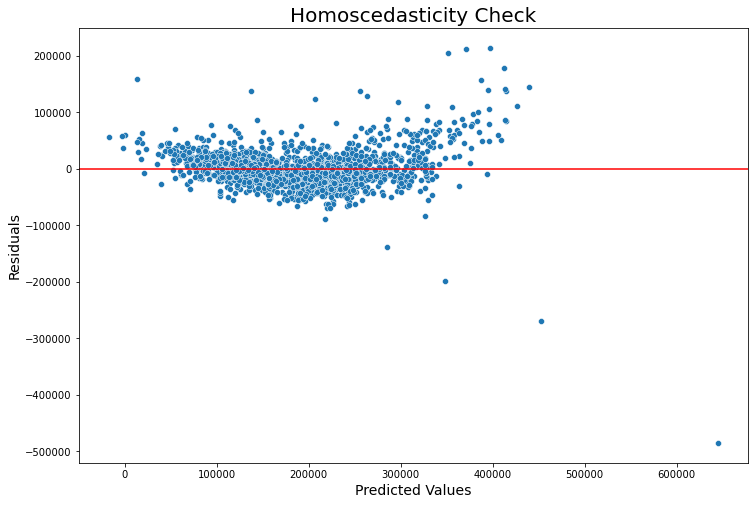

In [20]:
# Plotting residuals -- they seem to be evenly distributed with no discernable pattern
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=X, x=y_pred, y=y-y_pred) # y-y_pred = resids 
ax.axhline(y=0, color='red')
plt.title('Homoscedasticity Check', fontsize=20)
plt.ylabel('Residuals', fontsize=14)
plt.xlabel('Predicted Values', fontsize=14)

### Check for multicollinearity

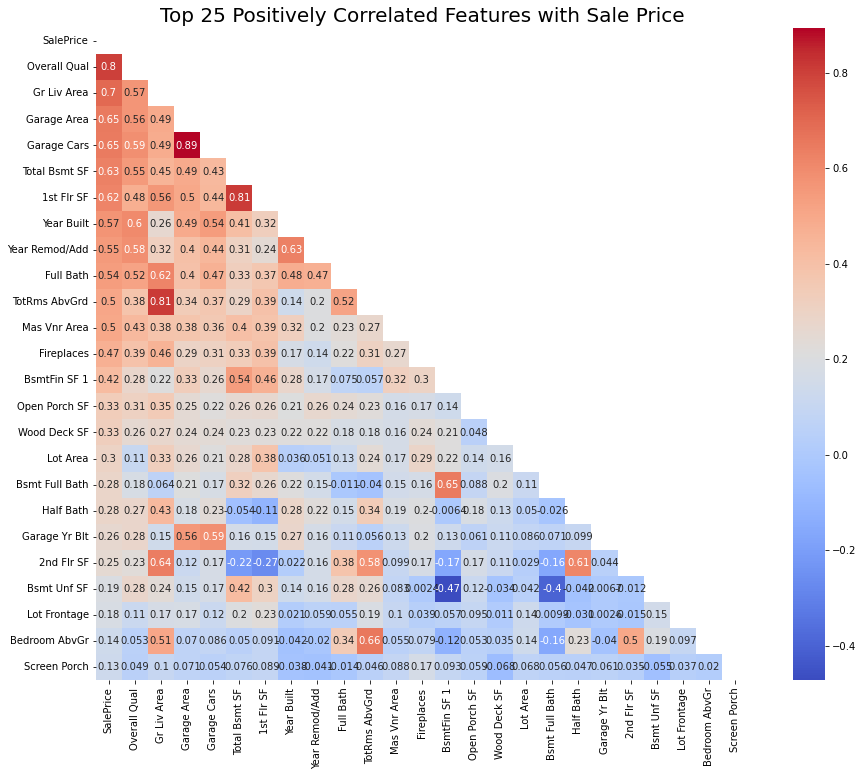

In [21]:
# Create mask for our top twenty positively correlated features
top_corr = df_train.corr()['SalePrice'].sort_values(ascending=False).head(25).index

#Plot heatmap of top twenty positively correlated features.
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(df_train[top_corr].corr(), dtype=bool))
ax = sns.heatmap(df_train[top_corr].corr(), cmap='coolwarm', mask=mask, square=True, annot=True)
plt.title('Top 25 Positively Correlated Features with Sale Price', fontsize=20);

In conclusion, though using linear regression is feasible here, we'll need to work to reduce multicollinearity and deal with highly skewed features further on. By performing data cleaning, feature engineering/selection and regularization, we should be able to create a linear model that can accurately predict the sale price of houses in Ames.